In [1]:
import numpy as np
import cv2
import math
import os
import shutil
import random

#display results
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
def load_image(filename):
    assert os.path.exists(filename)
    return cv2.imread(filename)
    # return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [3]:
FILENAME = "images/elephant.png"

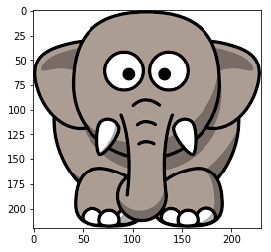

In [4]:
image = load_image(FILENAME)

plt.imshow(image)
plt.show()

### Identity

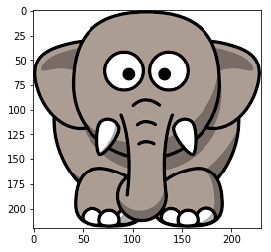

[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


In [6]:
kernel_size = 3
kernel = np.zeros((kernel_size, kernel_size),np.float32)
kernel[kernel_size // 2, kernel_size // 2] = 1

plt.imshow(cv2.filter2D(image, -1, kernel))
plt.show()

print(kernel)

### Average 

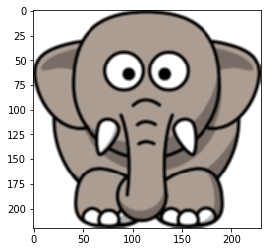

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [9]:
kernel_size = 9
kernel = np.ones((kernel_size, kernel_size),np.float32) / kernel_size**2

plt.imshow(cv2.filter2D(image, -1, kernel))
plt.show()

print(kernel)

### Shift Left

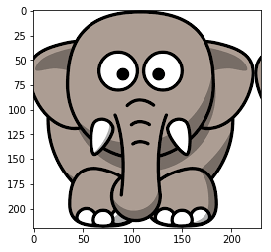

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [10]:
kernel_size = 13
kernel = np.zeros((kernel_size, kernel_size),np.float32)
kernel[kernel_size // 2, kernel_size - 1] = 1

plt.imshow(cv2.filter2D(image, -1, kernel))
plt.show()

print(kernel)

### Shift Right

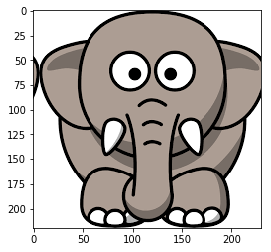

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [11]:
kernel_size = 13
kernel = np.zeros((kernel_size, kernel_size),np.float32)
kernel[kernel_size // 2, 0] = 1

plt.imshow(cv2.filter2D(image, -1, kernel))
plt.show()

print(kernel)

### Sharpening

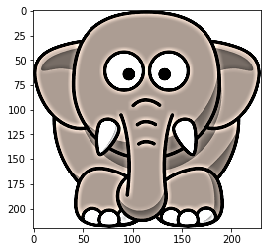

In [26]:
kernel_size = 9

identity = np.zeros((kernel_size, kernel_size),np.float32)
identity[kernel_size // 2, kernel_size // 2] = 2

average = np.ones((kernel_size, kernel_size),np.float32) / kernel_size**2

kernel = identity - average

plt.imshow(cv2.filter2D(image, -1, kernel))
plt.show()

### Gaussian

Text(0.5,0,'Sample')

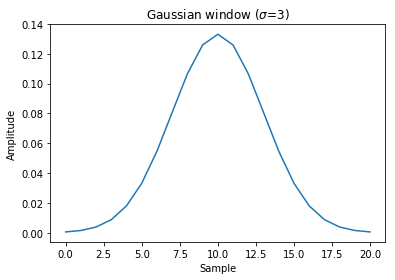

In [78]:
sigma = 3
kernel_size = 21
window = cv2.getGaussianKernel(kernel_size, sigma)

plt.plot(window)
plt.title(r"Gaussian window ($\sigma$={})".format(sigma))
plt.ylabel("Amplitude")
plt.xlabel("Sample")


In [102]:
gaussian_filter = np.array([1, 2, 1], dtype=np.float32)
# gaussian_filter = cv2.getGaussianKernel(9, 4).flatten()  # np.array([1, 2, 1], dtype=np.float32)

# Matrix multiplication
gaussian_filter = gaussian_filter.reshape((len(gaussian_filter), 1)) * gaussian_filter

# Divide by sum
gaussian_filter /= np.sum(gaussian_filter)

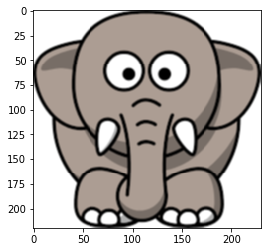

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


In [103]:
plt.imshow(cv2.filter2D(image, -1, gaussian_filter))
plt.show()

print(gaussian_filter)

### Sobel (Vertical Edge)

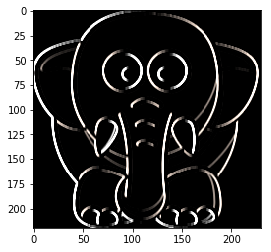

[[ 1.  0. -1.]
 [ 1.  0. -1.]
 [ 1.  0. -1.]]


In [111]:
kernel = np.array([[1, 0, -1]] * 3, dtype=np.float32)
# kernel = kernel.reshape((len(kernel), 1)) * kernel

plt.imshow(cv2.filter2D(image, -1, kernel))
plt.show()

print(kernel)

### Sobel (Horizontal Edge)

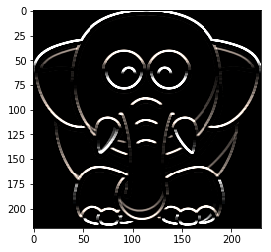

[[ 1.  1.  1.]
 [ 0.  0.  0.]
 [-1. -1. -1.]]


In [114]:
kernel = np.array([[1, 0, -1]] * 3, dtype=np.float32).T

plt.imshow(cv2.filter2D(image, -1, kernel))
plt.show()

print(kernel)

### Edge

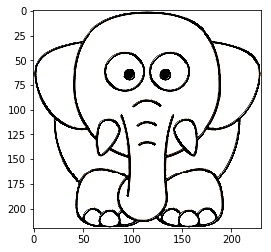

[[ 1.  2. -1.]
 [ 2.  4. -2.]
 [-1. -2.  1.]]


In [119]:
kernel = np.array([1, 2, -1], dtype=np.float32)
kernel = kernel.reshape((len(kernel), 1)) * kernel

plt.imshow(cv2.filter2D(image, -1, kernel))
plt.show()

print(kernel)

### Derivatives

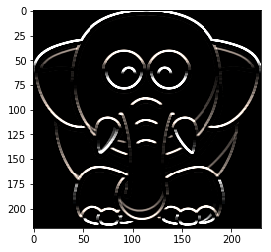

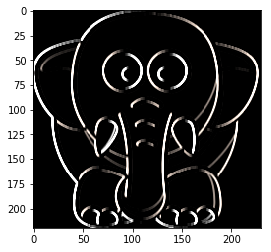

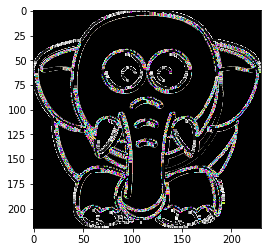

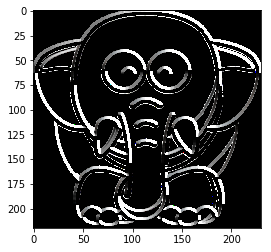

In [12]:
# DX
dx = cv2.filter2D(image, -1, np.array([[1, 0, -1]] * 3, dtype=np.float32).T)
plt.imshow(dx)
plt.show()

# DY
dy = cv2.filter2D(image, -1, np.array([[1, 0, -1]] * 3, dtype=np.float32))
plt.imshow(dy)
plt.show()

# Gradient
gradient = np.sqrt(np.square(dx) + np.square(dy))
plt.imshow(((gradient/np.max(gradient)) * 255).astype('uint8'))
plt.show()

# Angle
dy = dy.astype('float32') + 0.0001
angle = np.arctan(dx / dy)
plt.imshow(((angle/np.max(angle)) * 255).astype('uint8'))
plt.show()

### Integral Image

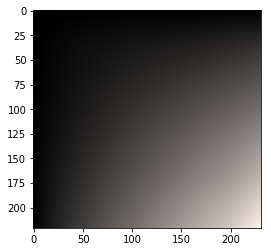

In [13]:
integral = cv2.integral(image)

plt.imshow(((integral/np.max(integral)) * 255).astype('uint8'))
plt.show()

### HOG

/home/taras/python-environments/cv/lib/python3.6/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


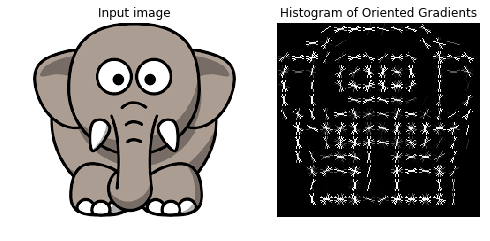

In [14]:
from skimage.feature import hog
from skimage import exposure


fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

### HAAR Features

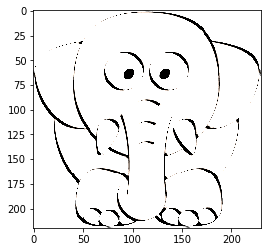

In [15]:
kernel = [
    [-1, -1, 5],
    [-1, -1, 5],
    [-1, -1, 5]
]

kernel = [
    [5, -1, -1],
    [-1, 5, -1],
    [-1, -1, 5]
]
kernel = np.array(kernel)

dx = cv2.filter2D(image, -1, kernel)
plt.imshow(dx)
plt.show()